In [285]:
___Author___='LumberJack Jyss'

In [286]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [287]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [288]:
import warnings
warnings.filterwarnings("ignore")

In [289]:
df = pd.read_csv('spx_5Y.csv')
df = df.iloc[:,1:-1]

In [290]:
df.head()

Date     Open     High      Low    Close
0  20140606  1942.41  1949.44  1942.41  1949.44
1  20140609  1948.97  1955.55  1947.16  1951.27
2  20140610  1950.34  1950.79  1944.64  1950.79
3  20140611  1949.37  1949.37  1940.08  1943.89
4  20140612  1943.35  1943.35  1925.78  1930.11

In [291]:
df.tail()

Date     Open     High      Low    Close
1252  20190529  2790.25  2792.03  2766.06  2783.02
1253  20190530  2786.94  2799.00  2776.74  2788.86
1254  20190531  2766.15  2768.98  2750.52  2752.06
1255  20190603  2751.53  2763.07  2728.81  2744.45
1256  20190604  2762.64  2804.49  2762.63  2803.40

In [292]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Period of study : ",delta)
print(' Slash : 80% - 20%  ')
print('Bloc 1 : ',bloc1,' periods \nBloc 2 :',bloc2,' periods')

Period of study :  1257
 Slash : 80% - 20%  
Bloc 1 :  1006  periods 
Bloc 2 : 251  periods


In [293]:
dataset_15min = df.copy()

In [294]:
rsi = talib.RSI(dataset_15min['Close'],timeperiod=14)
upper, middle, lower =  talib.BBANDS(dataset_15min['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_15min['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_15min['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_15min['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_15min['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_15min['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_15min['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_15min['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_15min['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_15min['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_15min['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

In [295]:
X = dataset_15min['Close']
pivots = peak_valley_pivots(X.values, 0.02, -0.02)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots_up = ts_pivots[pivots == -1]
ts_pivots_down = ts_pivots[pivots == 1]
ts_pivots_all = ts_pivots[pivots!=0]

In [296]:
peak = []
valley = []

for i in range(0,dataset_15min.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        

In [297]:
bbdelta = upper - middle
price_bolup = dataset_15min['Close'] - lower
price_bolow = dataset_15min['Close'] - upper

In [298]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_15min.shape[0]):
    rsi75_list.append(75 - rsi[i])
    rsi25_list.append(rsi[i] - 25)

In [299]:
varop_spy = dataset_15min['Open'] - dataset_15min['Close']
varhl_spy = dataset_15min['High'] - dataset_15min['Low']

In [300]:
dataset_15min['Varop_Spy'] = varop_spy
dataset_15min['Varhl_spy'] = varhl_spy
dataset_15min['RSI'] = rsi
dataset_15min['75 - RSI'] = np.array(rsi75_list)
dataset_15min['RSI - 25'] = np.array(rsi25_list)

In [301]:
dataset_15min['BBD_Delta_Up'] = bbdelta

In [302]:
dataset_15min['delta5_8'] = delta5_8
dataset_15min['delta8_10'] = delta8_10
dataset_15min['delta10_12'] = delta10_12
dataset_15min['delta12_15'] = delta12_15
dataset_15min['delta15_30'] = delta15_30
dataset_15min['delta30_35'] = delta30_35
dataset_15min['delta35_40'] = delta35_40
dataset_15min['delta40_45'] = delta40_45
dataset_15min['delta45_50'] = delta45_50

In [303]:
tsf = talib.TSF(dataset_15min['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1257)

In [304]:
delta_tsf = dataset_15min['Close'] - tsf
dataset_15min['delta_tsf'] = tsf
delta_tsf.shape

(1257,)

In [305]:
forosc = []
forosc.append(0)
for i in range(1,dataset_15min.shape[0]):
    forosc.append((dataset_15min.iloc[i,4] - tsf[i-1])*100/dataset_15min.iloc[i,4])
len(forosc),type(forosc)

(1257, list)

In [306]:
dataset_15min['Forcast Oscillator'] = (forosc)

In [307]:
dataset_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 22 columns):
Date                  1257 non-null int64
Open                  1257 non-null float64
High                  1257 non-null float64
Low                   1257 non-null float64
Close                 1257 non-null float64
Varop_Spy             1257 non-null float64
Varhl_spy             1257 non-null float64
RSI                   1243 non-null float64
75 - RSI              1243 non-null float64
RSI - 25              1243 non-null float64
BBD_Delta_Up          1249 non-null float64
delta5_8              1250 non-null float64
delta8_10             1248 non-null float64
delta10_12            1246 non-null float64
delta12_15            1243 non-null float64
delta15_30            1228 non-null float64
delta30_35            1223 non-null float64
delta35_40            1218 non-null float64
delta40_45            1213 non-null float64
delta45_50            1208 non-null float64
delta_tsf      

In [308]:
target_up = []
target_down = []

for i in range(0,dataset_15min.shape[0]-1):
    if (dataset_15min.iloc[i+1,5] * dataset_15min.iloc[i,5]) < 0 :
        if (dataset_15min.iloc[i+1,4] - dataset_15min.iloc[i,4]) > 30 : #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_15min.iloc[i+1,4] - dataset_15min.iloc[i,4]) < -30: #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)

In [309]:
dataset_15min['Peak'] = target_down
dataset_15min['Valley'] = target_up

In [310]:
len(target_up),len(target_down), len(peak),len(valley),type(target_up),type(target_down), type(peak),type(valley),sum(target_up),sum(target_down)

(1257, 1257, 1257, 1257, list, list, list, list, 37, 32)

In [311]:
move_up = []
move_down = []
for i in range(0,len(target_up)):
    if abs(target_up[i]) == 1 and abs(valley[i]) == 1:
        move_up.append(1)
    else:
        move_up.append(0)
    if abs(target_down[i]) == 1 and abs(peak[i]) == 1:
        move_down.append(1)
    else:
        move_down.append(0)

In [312]:
len(move_up),len(move_down)

(1257, 1257)

In [313]:
# abs(np.array(valley))
# abs(np.array(peak))
# target_up
# target_down
# move_up
# move_down

dataset_15min['target_up'] = abs(np.array(valley))
dataset_15min['target_down'] = abs(np.array(peak))

In [314]:
dataset_15min['target_up'].sum(),dataset_15min['target_down'].sum()

(42, 43)

In [315]:
dataset_15min['target_value'] = dataset_15min['Close']
dataset_15min = dataset_15min.drop(['Open','High','Low','Close'],axis=1)

In [316]:
dataset_15min.to_csv('20190526 data prepared.csv')

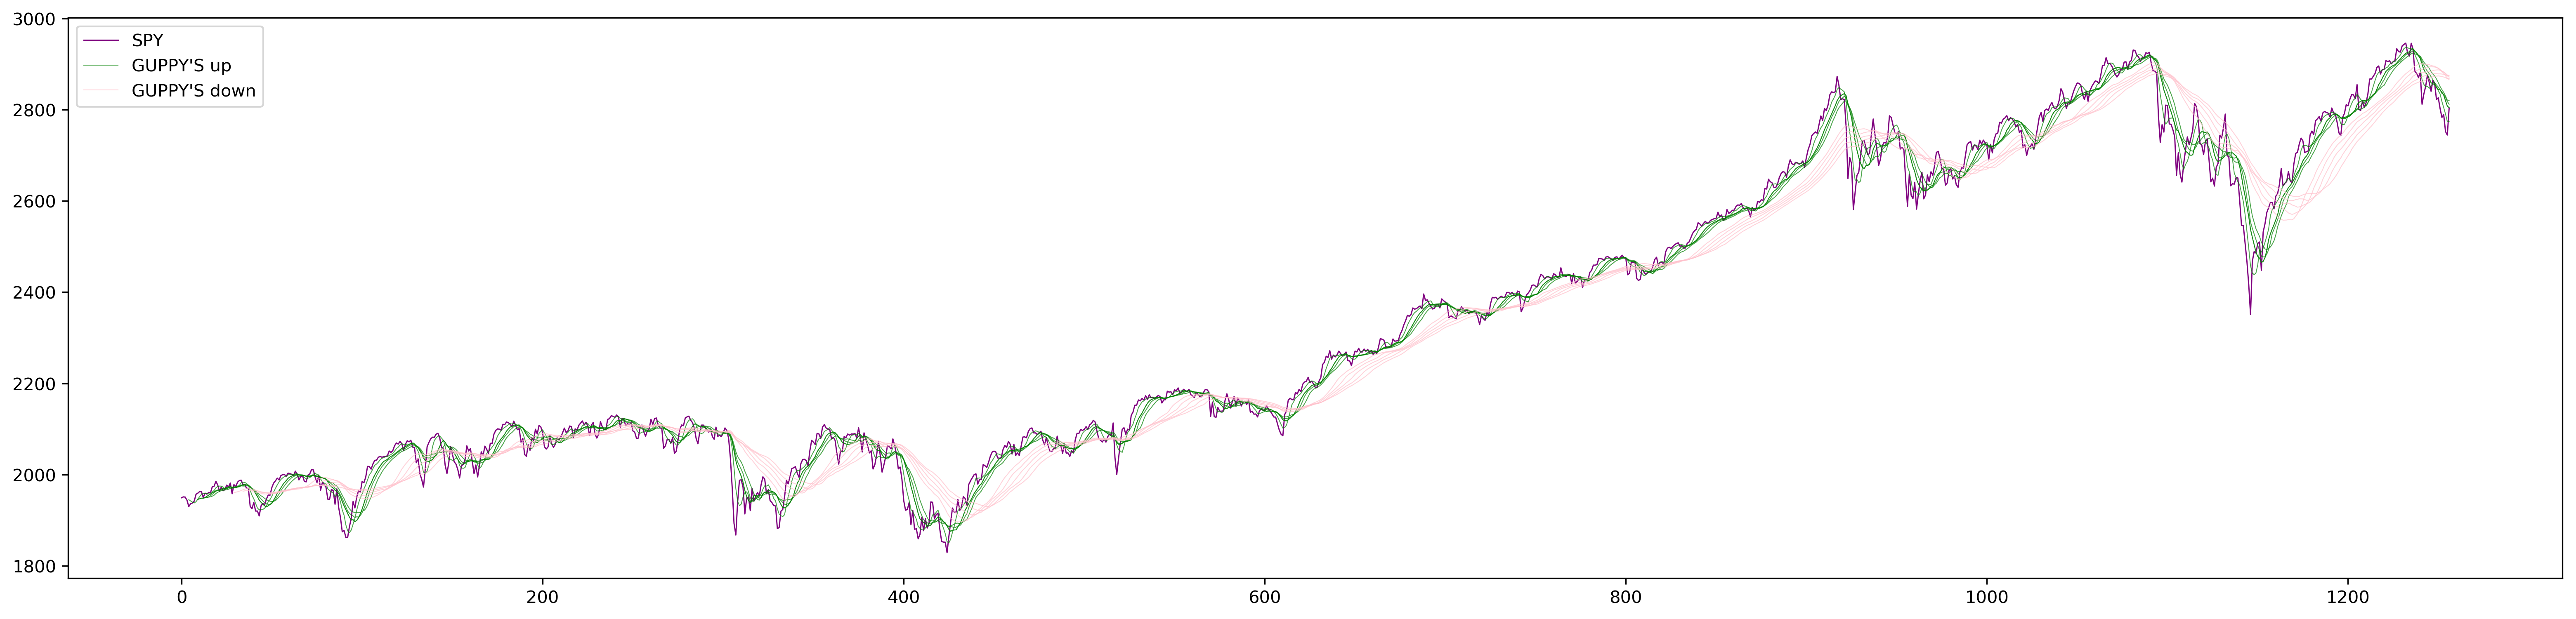

In [317]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_15min['target_value'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

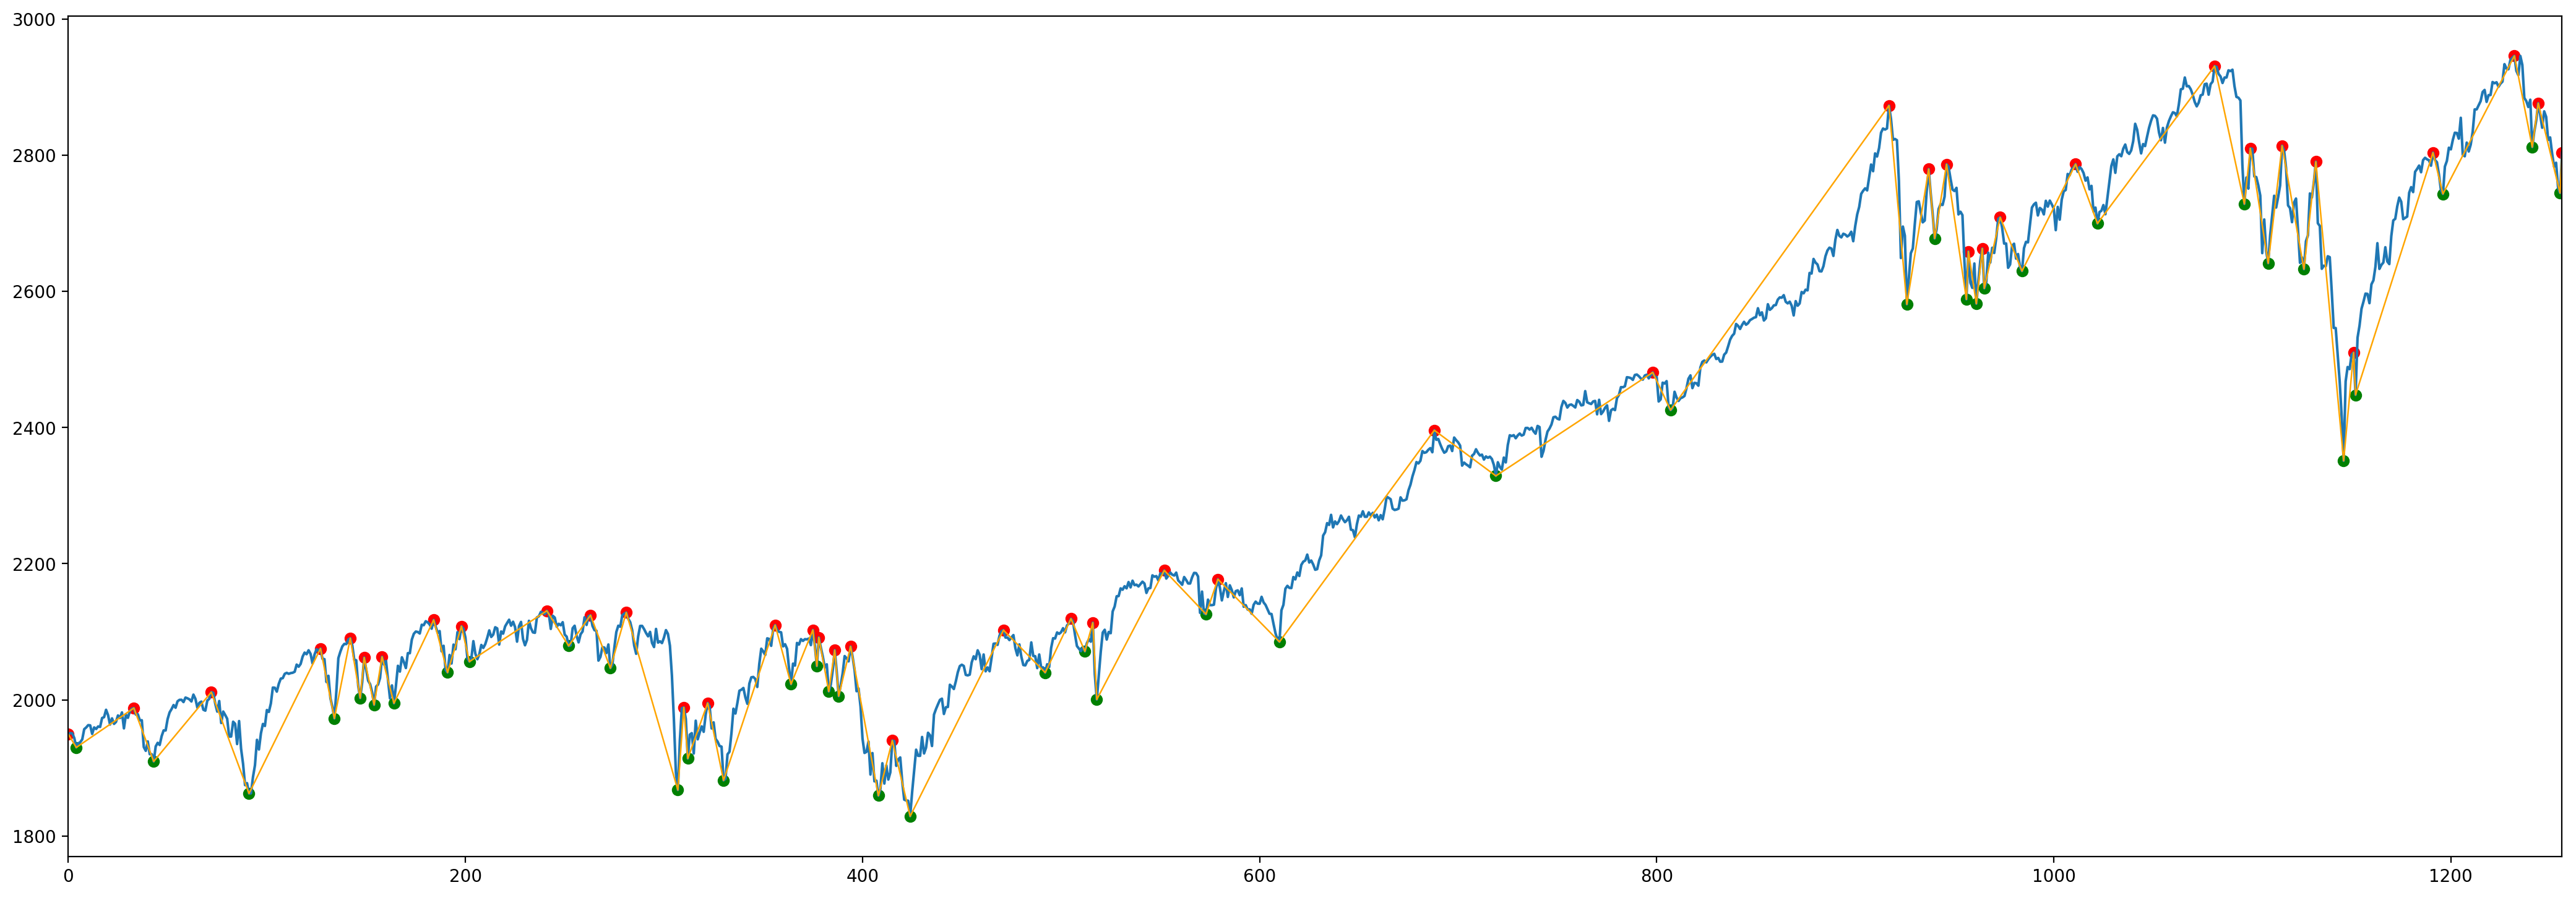

In [318]:
plt.figure(figsize=(26,9),dpi=200)
X.plot()
#ts_pivots_up.plot(style='g-o',lw=0.8,alpha=0.8)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

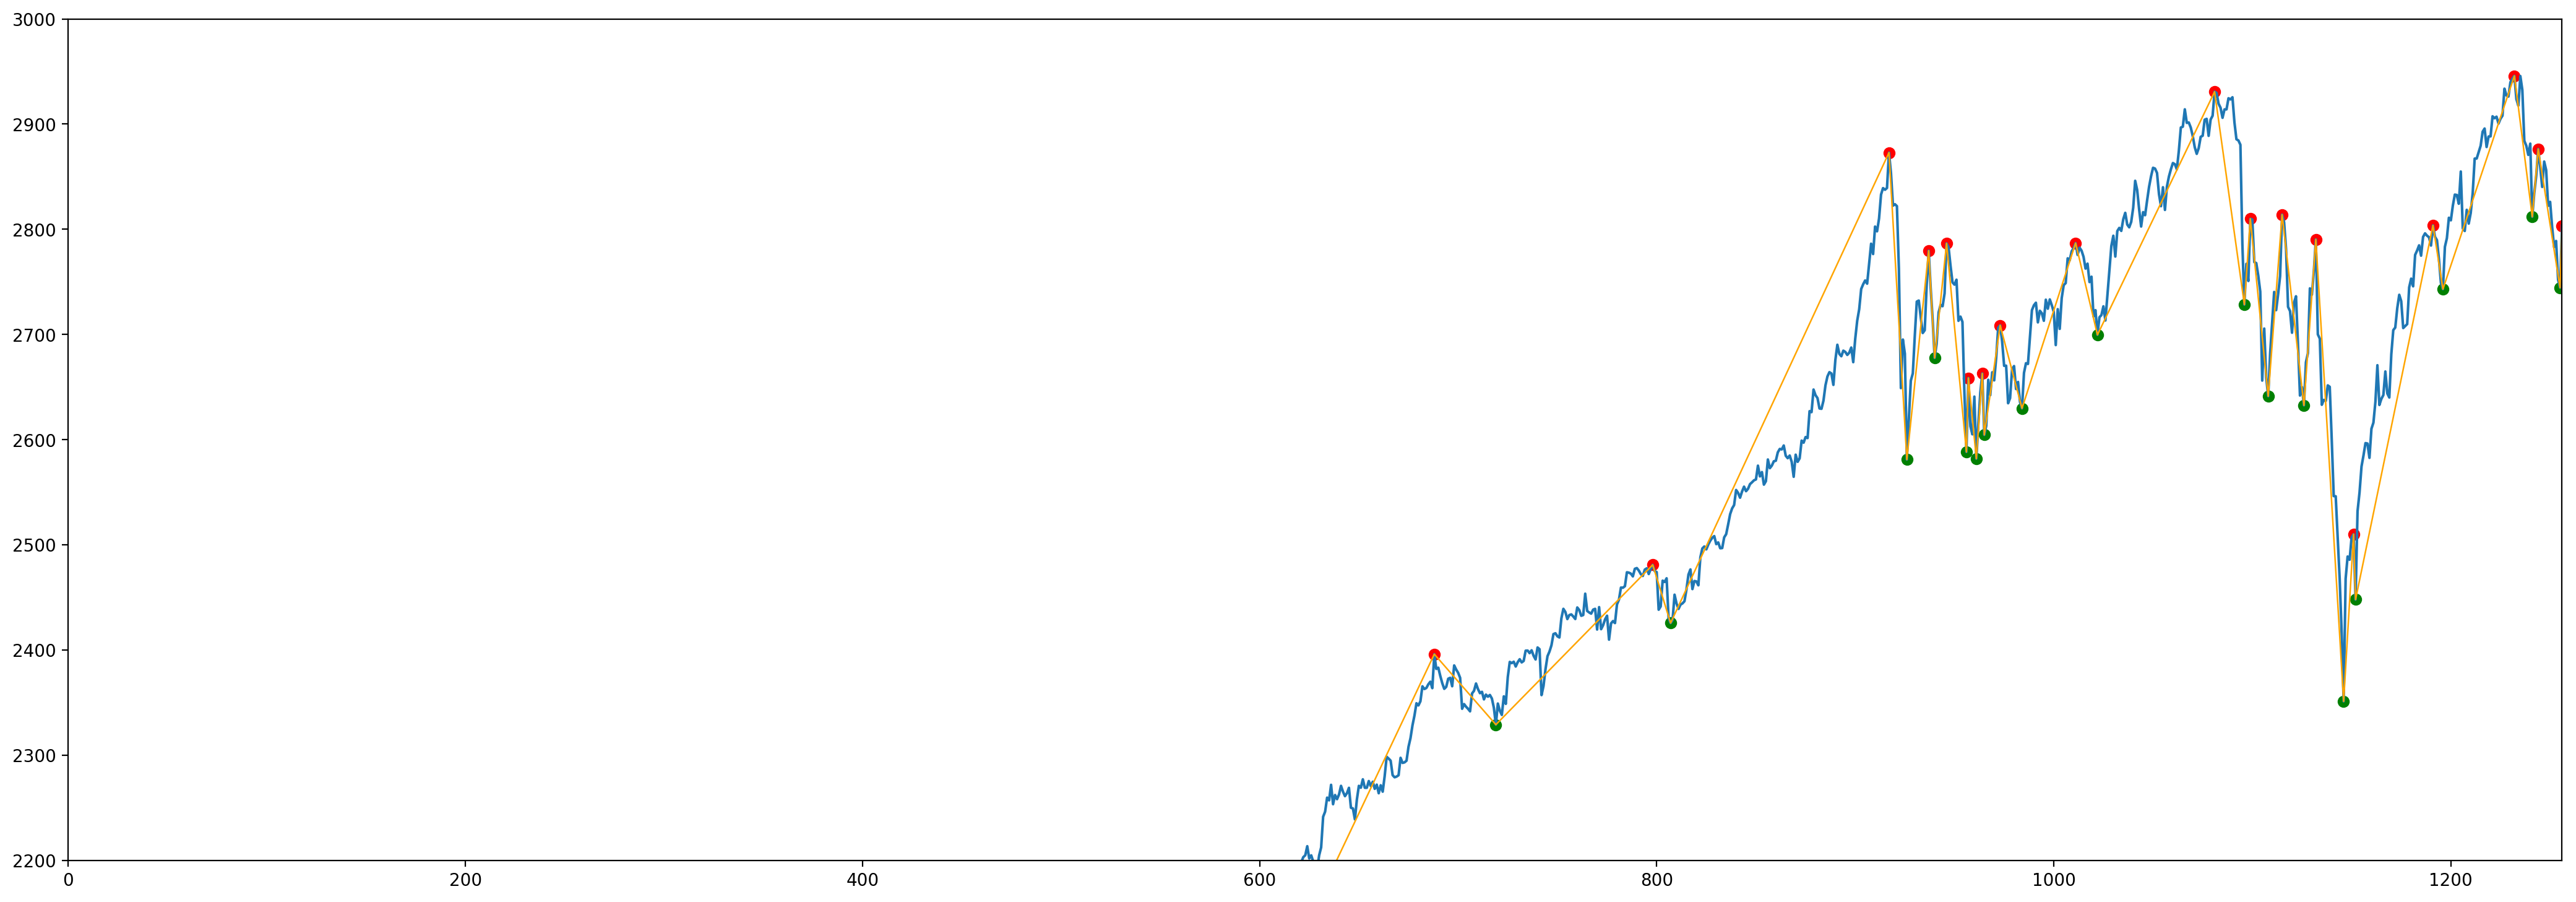

In [319]:
plt.figure(figsize=(26,9),dpi=200)
plt.xlim((600,1300))
plt.ylim((2200,3000))
plt.plot(X)
ts_pivots_all.plot(color='orange',lw=0.9)
plt.scatter(x=ts_pivots_up.index,y=ts_pivots_up[:],c='g')
plt.scatter(x=ts_pivots_down.index,y=ts_pivots_down[:],c='r')
plt.show()
plt.close()

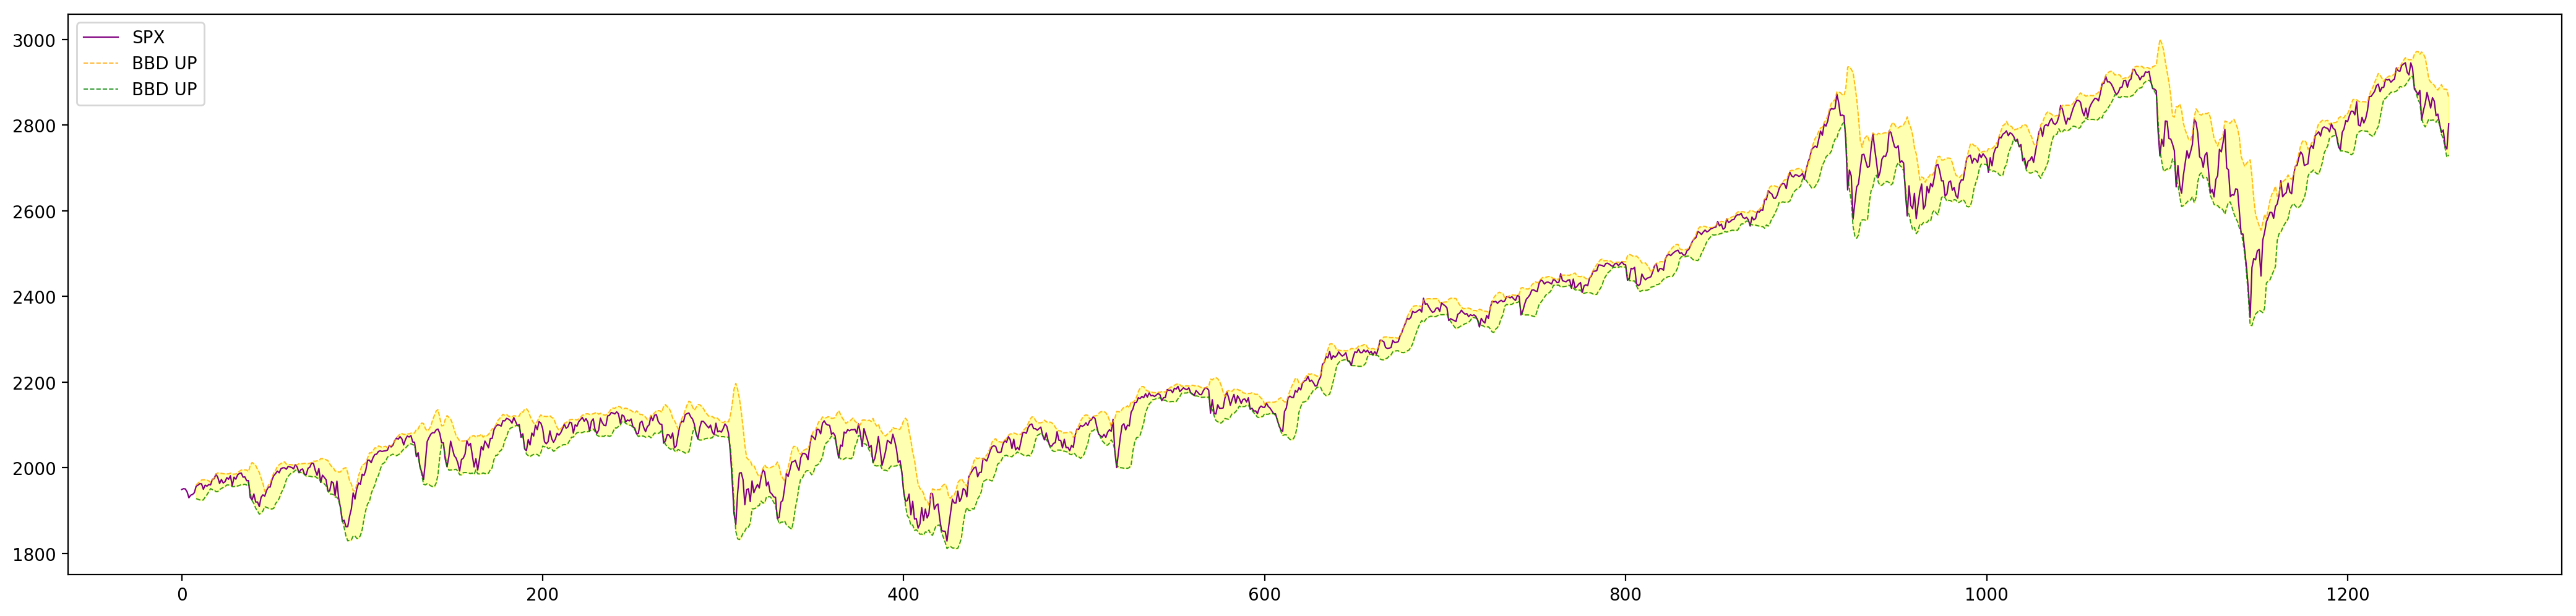

In [320]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_15min['target_value'],label = 'SPX',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_15min.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

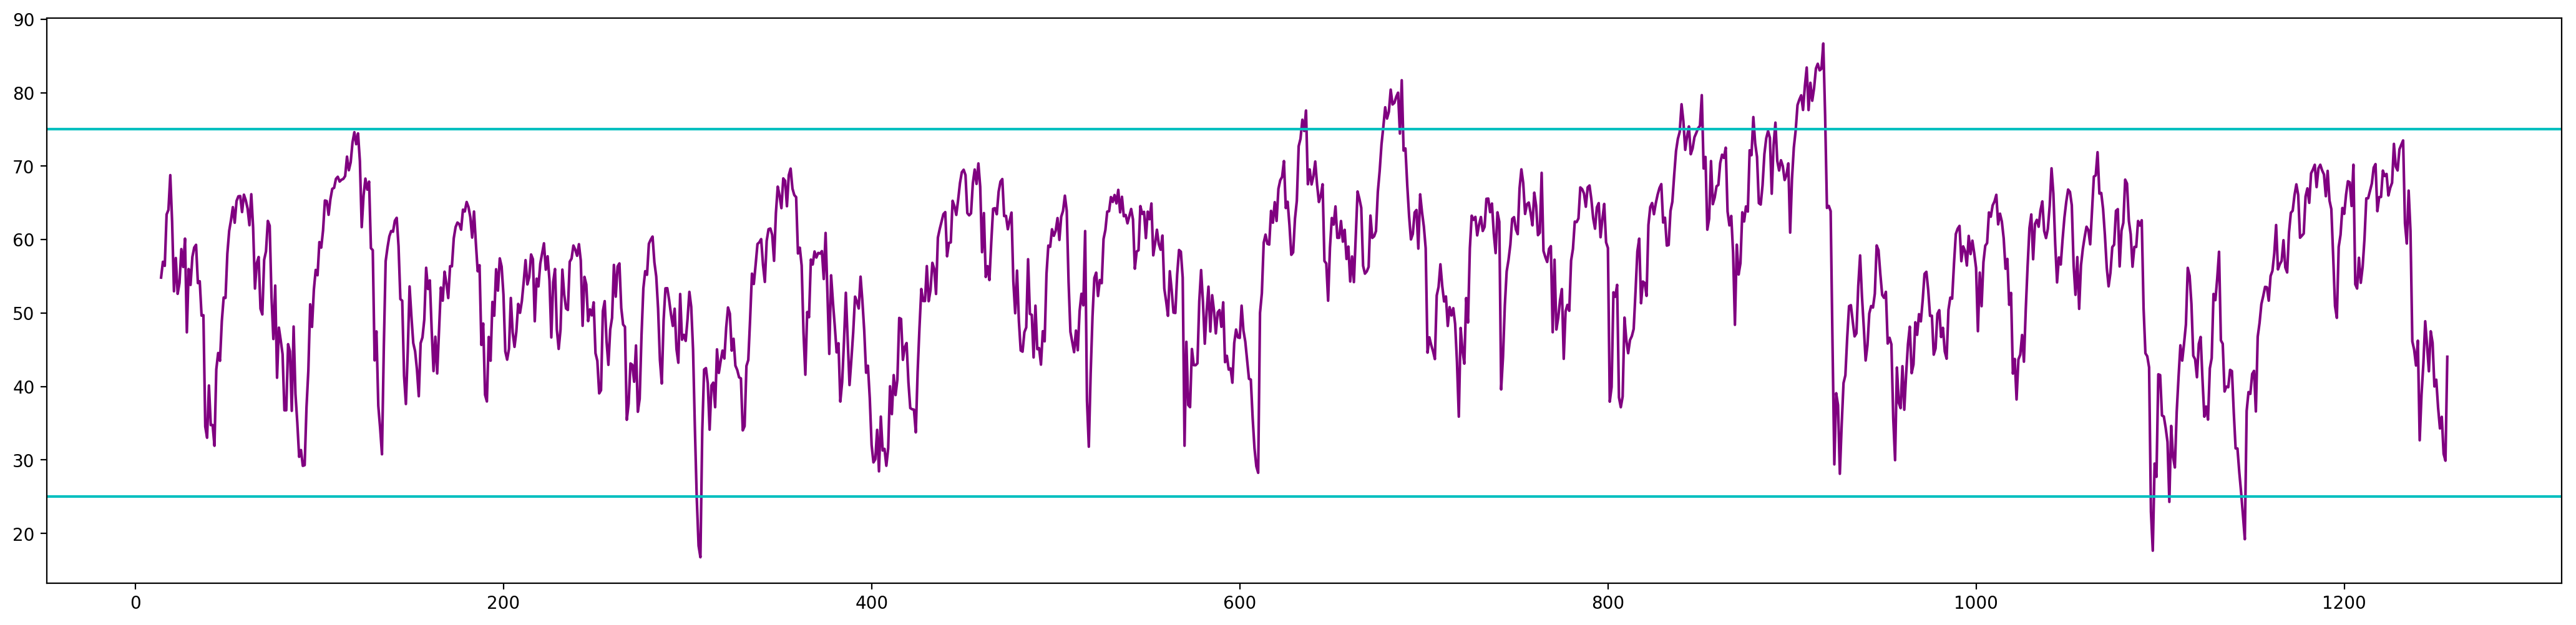

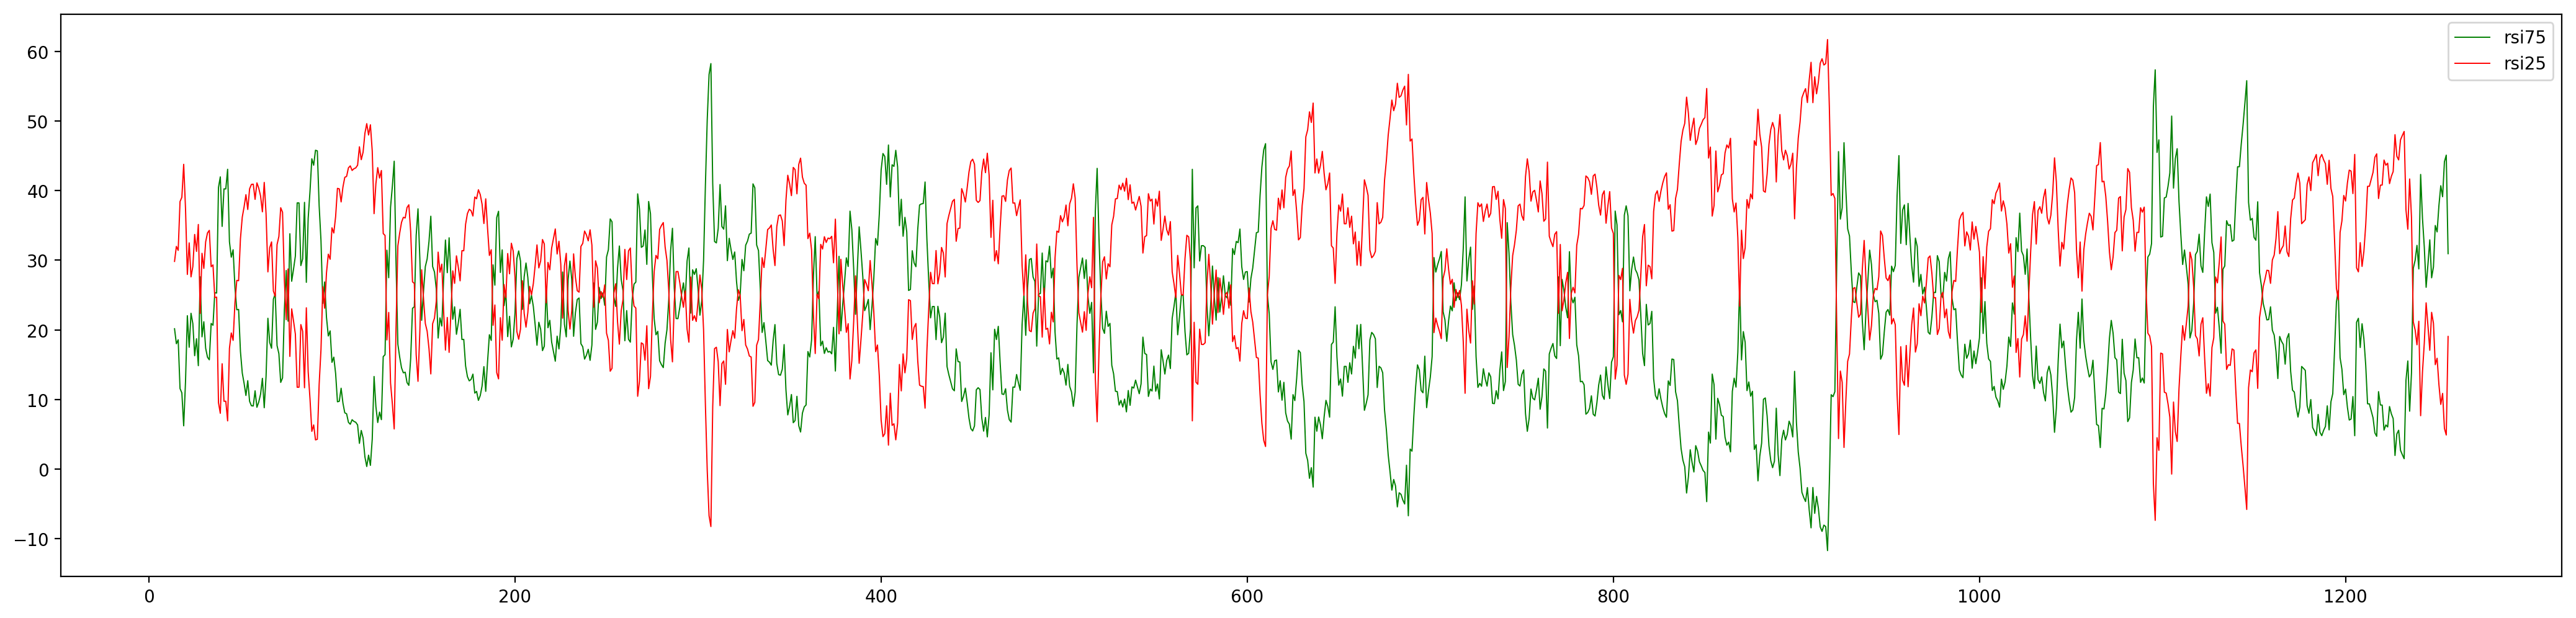

In [321]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

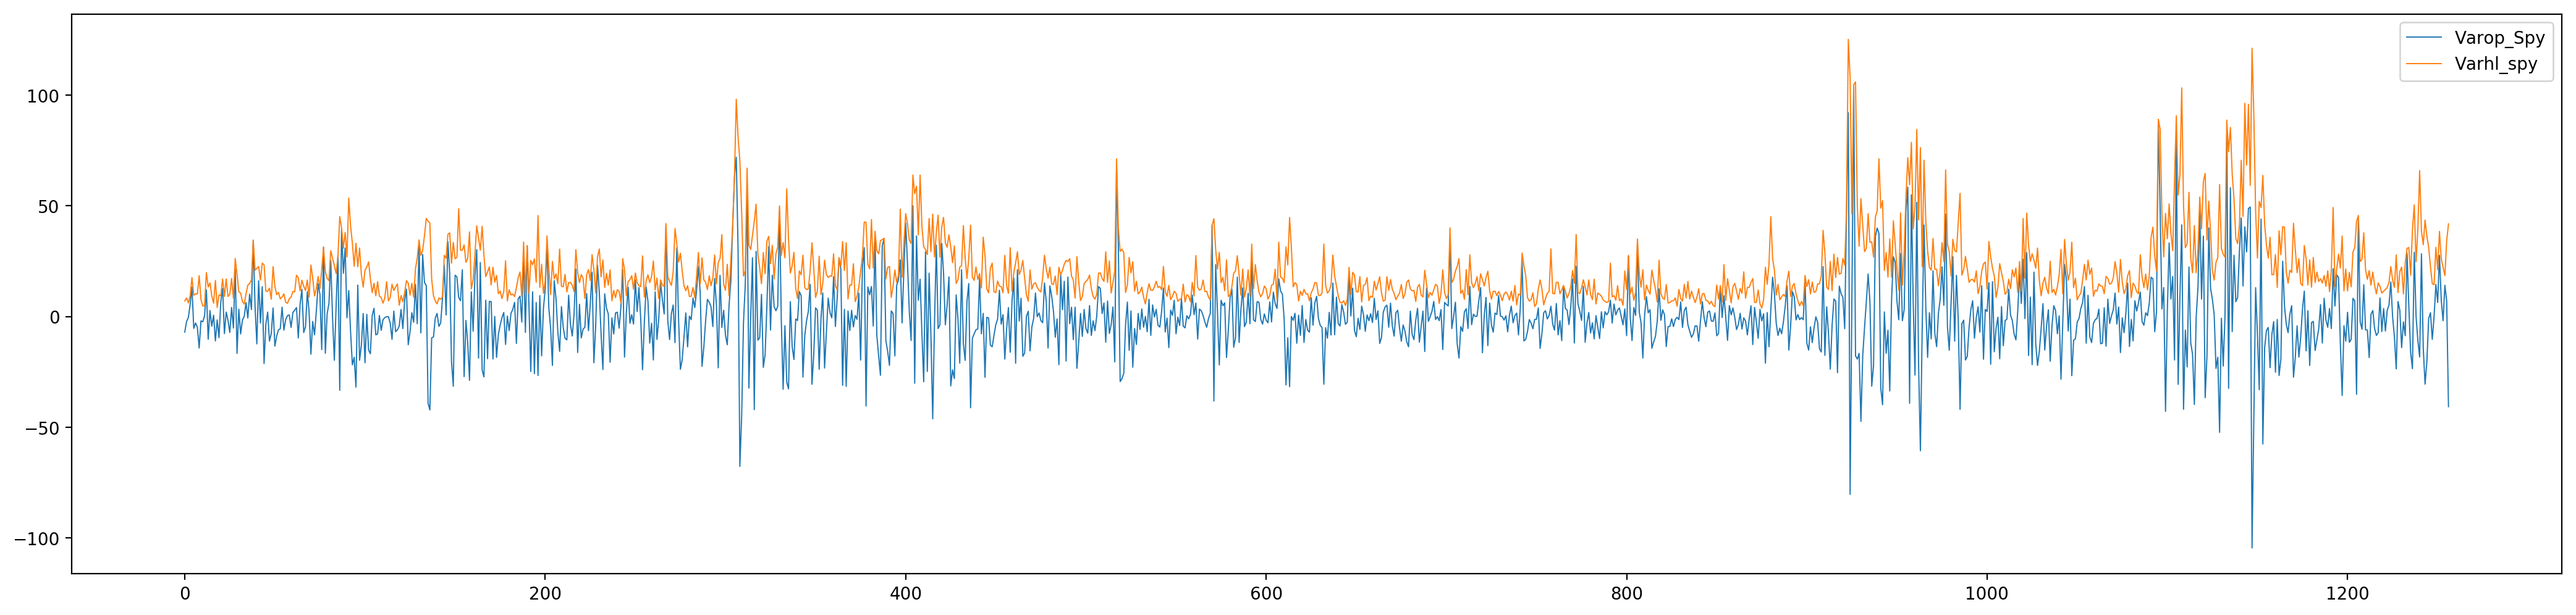

In [322]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_15min['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_15min['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()


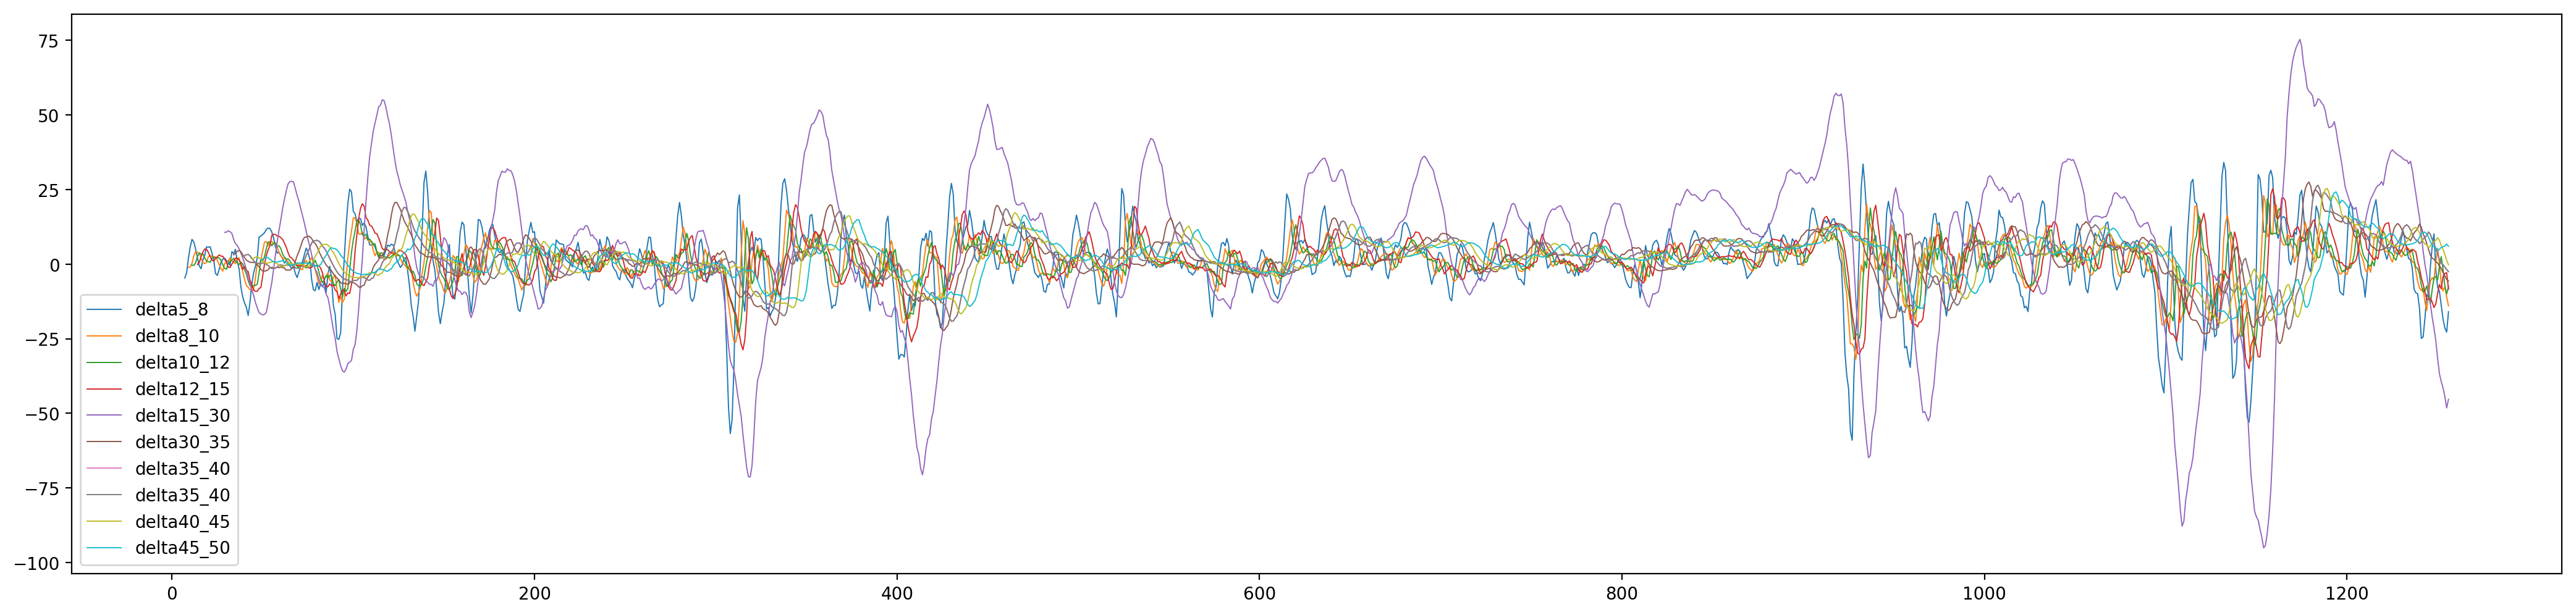

In [323]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_15min['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_15min['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_15min['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_15min['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_15min['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_15min['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_15min['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_15min['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_15min['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_15min['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

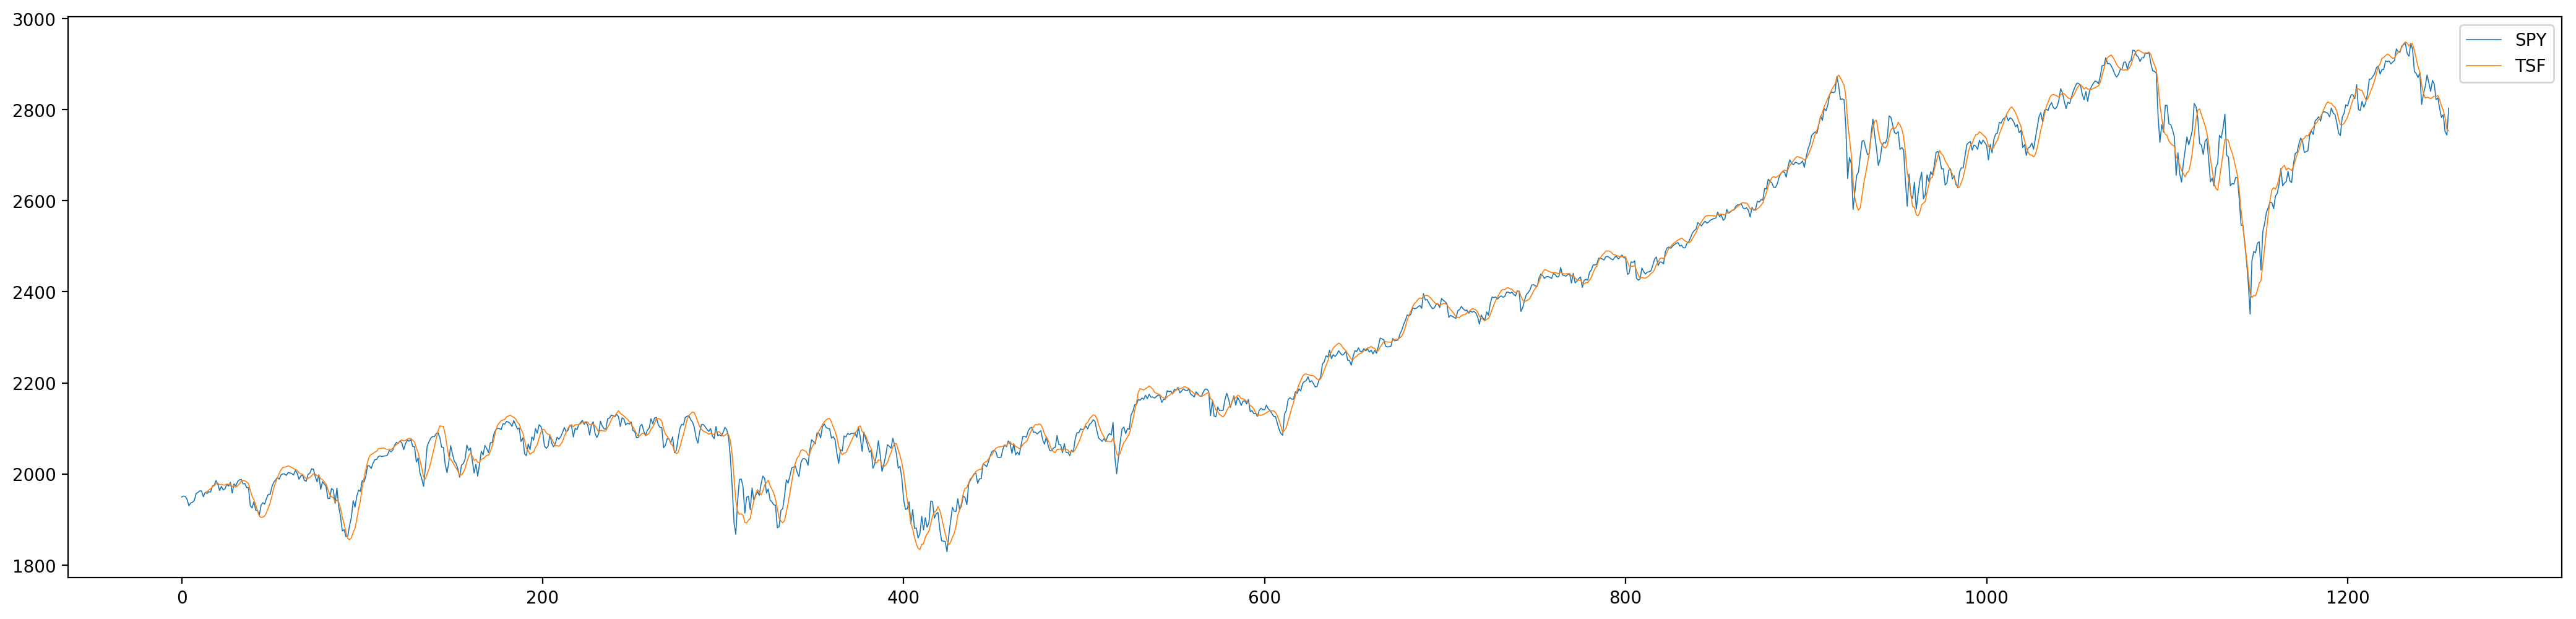

In [324]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_15min['target_value'],label = 'SPY',lw=0.6)
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF',lw=0.6)
plt.legend()
plt.show()

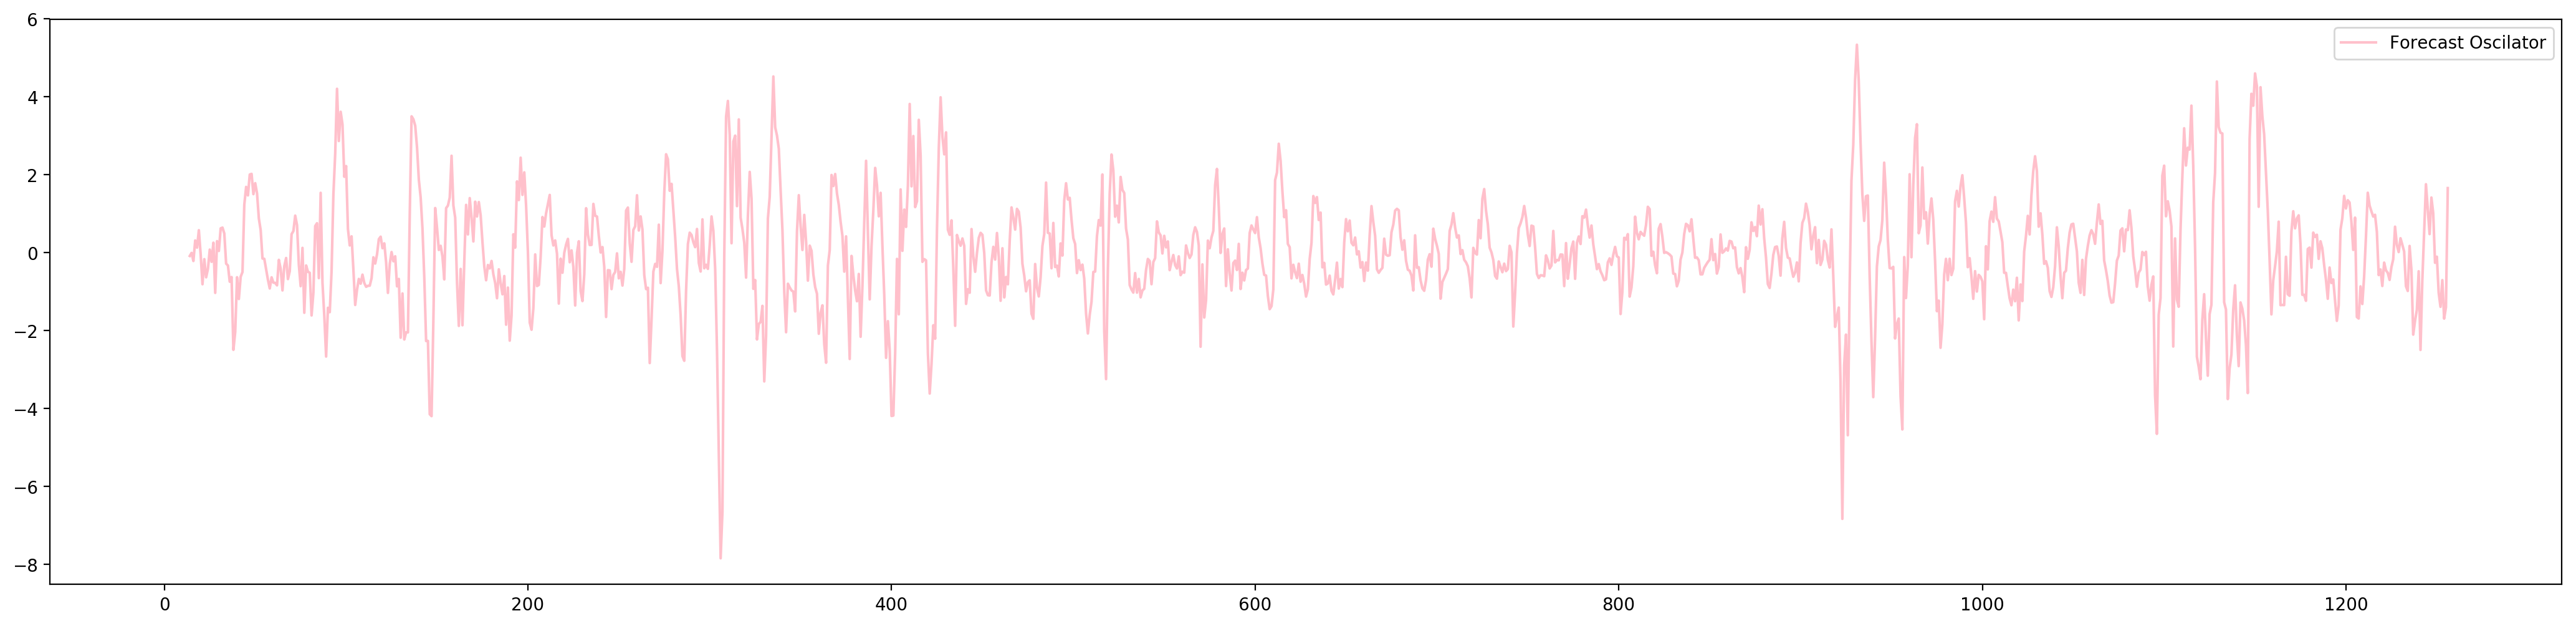

In [325]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_15min['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

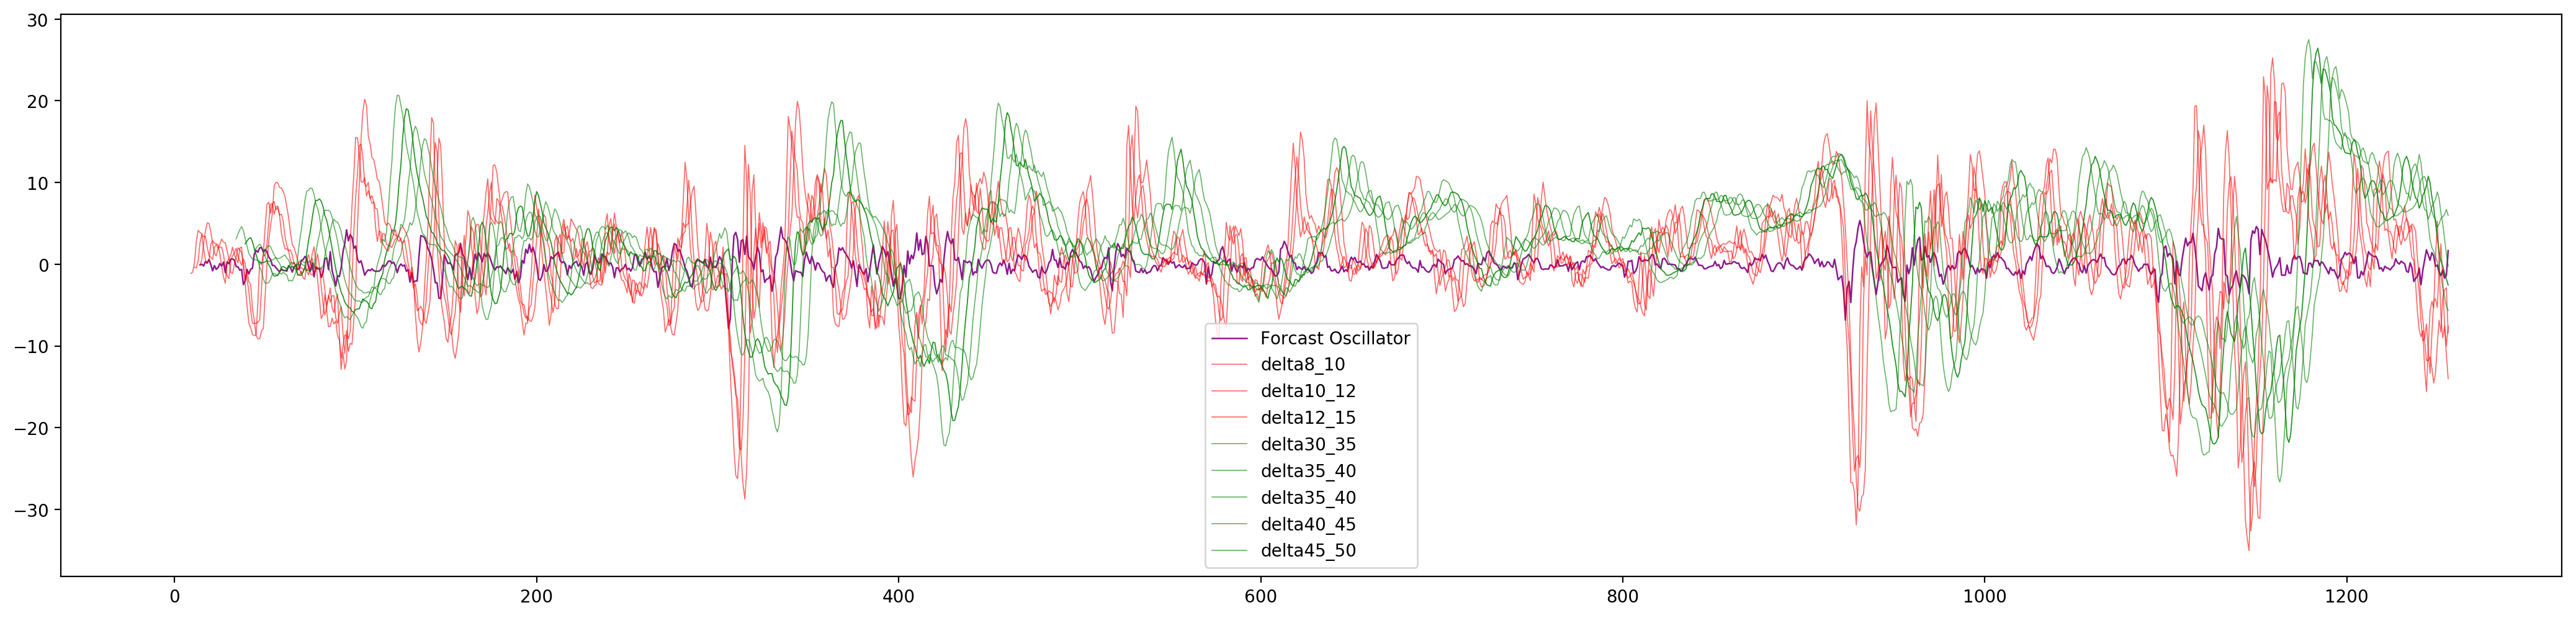

In [326]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_15min['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_15min['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_15min['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_15min['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_15min['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_15min['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_15min['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_15min['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_15min['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

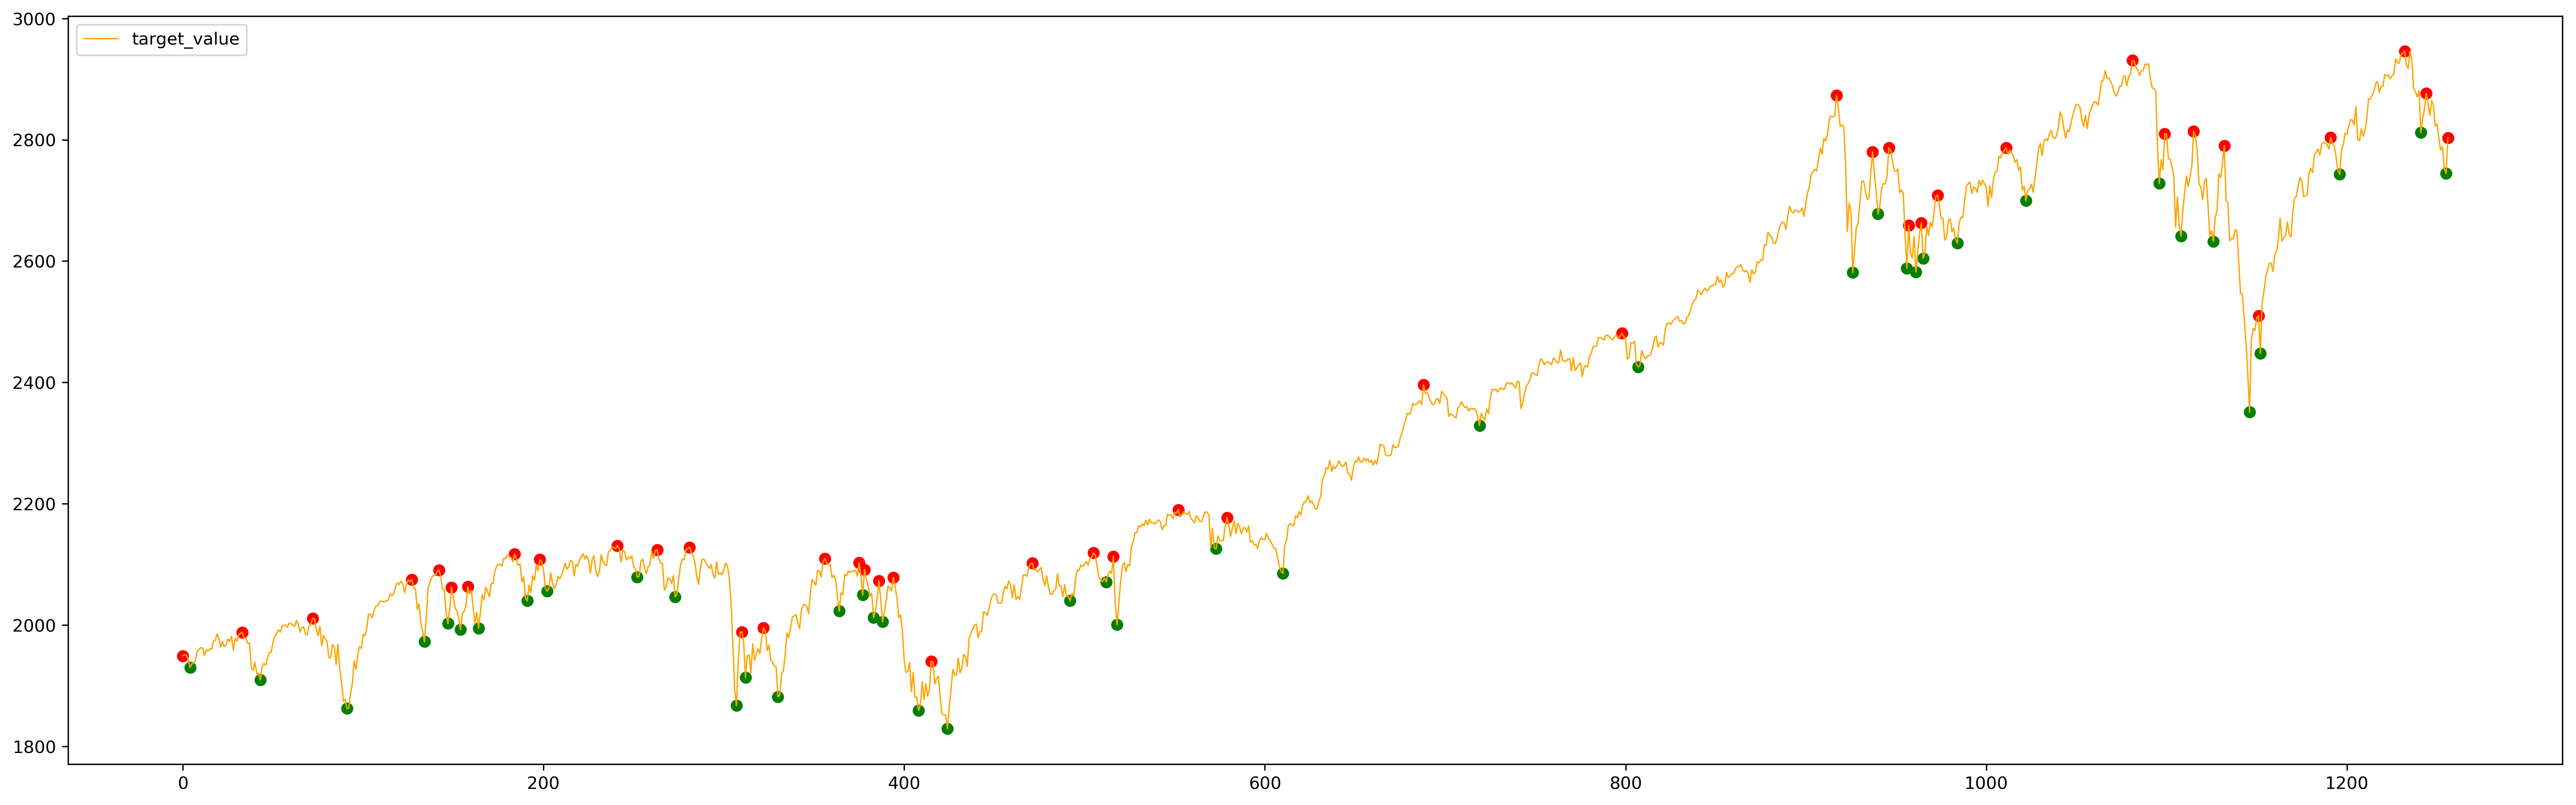

In [327]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_15min['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_15min)):
    if dataset_15min.iloc[i,-3] == 1:
        plt.scatter(x=dataset_15min.index[i],y=dataset_15min.iloc[i,-1],c='g',marker='o')
    elif dataset_15min.iloc[i,-2] == 1:
        plt.scatter(x=dataset_15min.index[i],y=dataset_15min.iloc[i,-1],c='r',marker='o')
plt.legend()

In [328]:
len(peak),len(valley),len(ts_pivots)

(1257, 1257, 1257)

In [329]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    410.000000
        1    846.000000
mean   -1     -0.004883
        1      0.002849
std    -1      0.009177
        1      0.006723
min    -1     -0.040979
        1     -0.018975
25%    -1     -0.008839
        1     -0.000999
50%    -1     -0.002842
        1      0.001664
75%    -1      0.000267
        1      0.005999
max    -1      0.018625
        1      0.049594
dtype: float64

In [330]:
compute_segment_returns(X, pivots).sum()

0.0

In [331]:
print('max_drawdown : ',round(max_drawdown(np.array(X))*100,2),'%')

max_drawdown :  19.78 %
